# Diwali Sale Analysis

Importing Python Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Importing CSV File

In [2]:
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# Data Preprocessing

Droping blank columns

In [6]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [7]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
# droping null values
df.dropna(inplace=True)

In [9]:
# Changing data type
df['Amount'] = df['Amount'].astype('int')

In [10]:
df['Amount'].dtypes

dtype('int32')

In [11]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [12]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [13]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

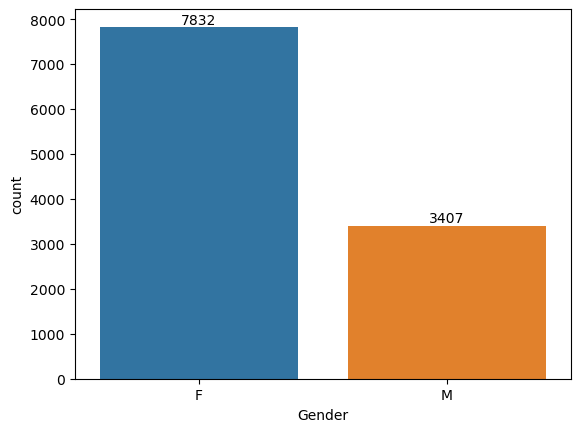

In [14]:
# plotting a bar chart for Gender and it's count
ax = sns.countplot(x = 'Gender',data = df)
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Gender', ylabel='Amount'>

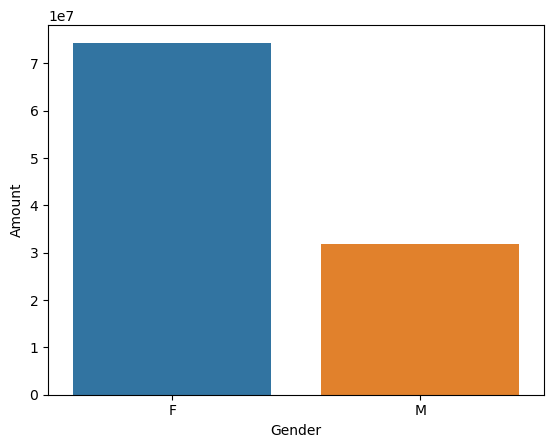

In [15]:
# plotting a bar chart for gender vs total amount
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men.*

### Age

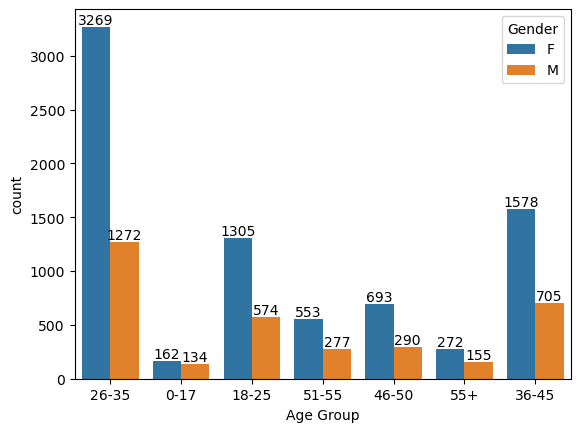

In [16]:
#Total Buyers vs Age Group
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

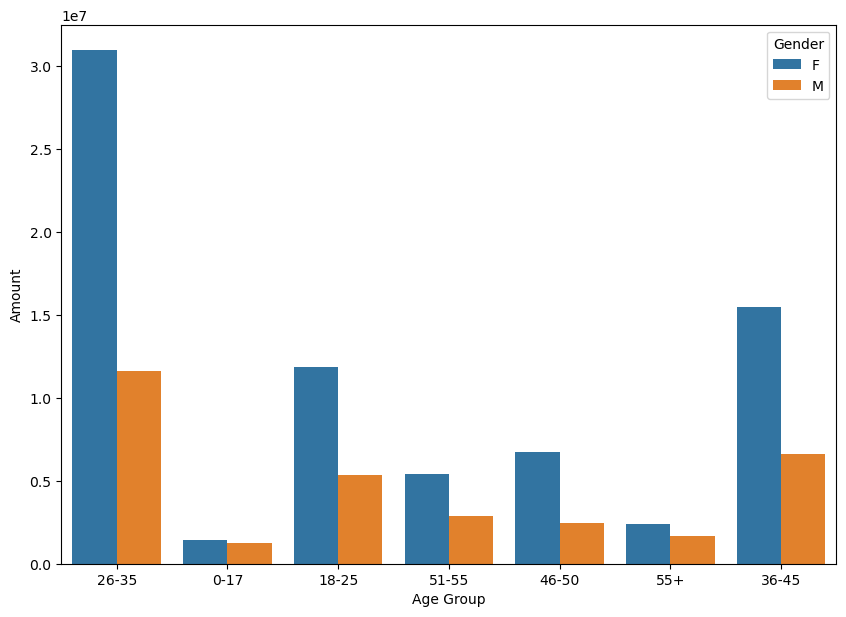

In [17]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group','Gender','Marital_Status'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(10,7))
barplot=sns.barplot(x = 'Age Group',y= 'Amount' ,data = df,ci=None, estimator=sum,hue = 'Gender')

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female and there spending power is also greater than any other age group*

# Zone Wise

<Figure size 500x2000 with 0 Axes>

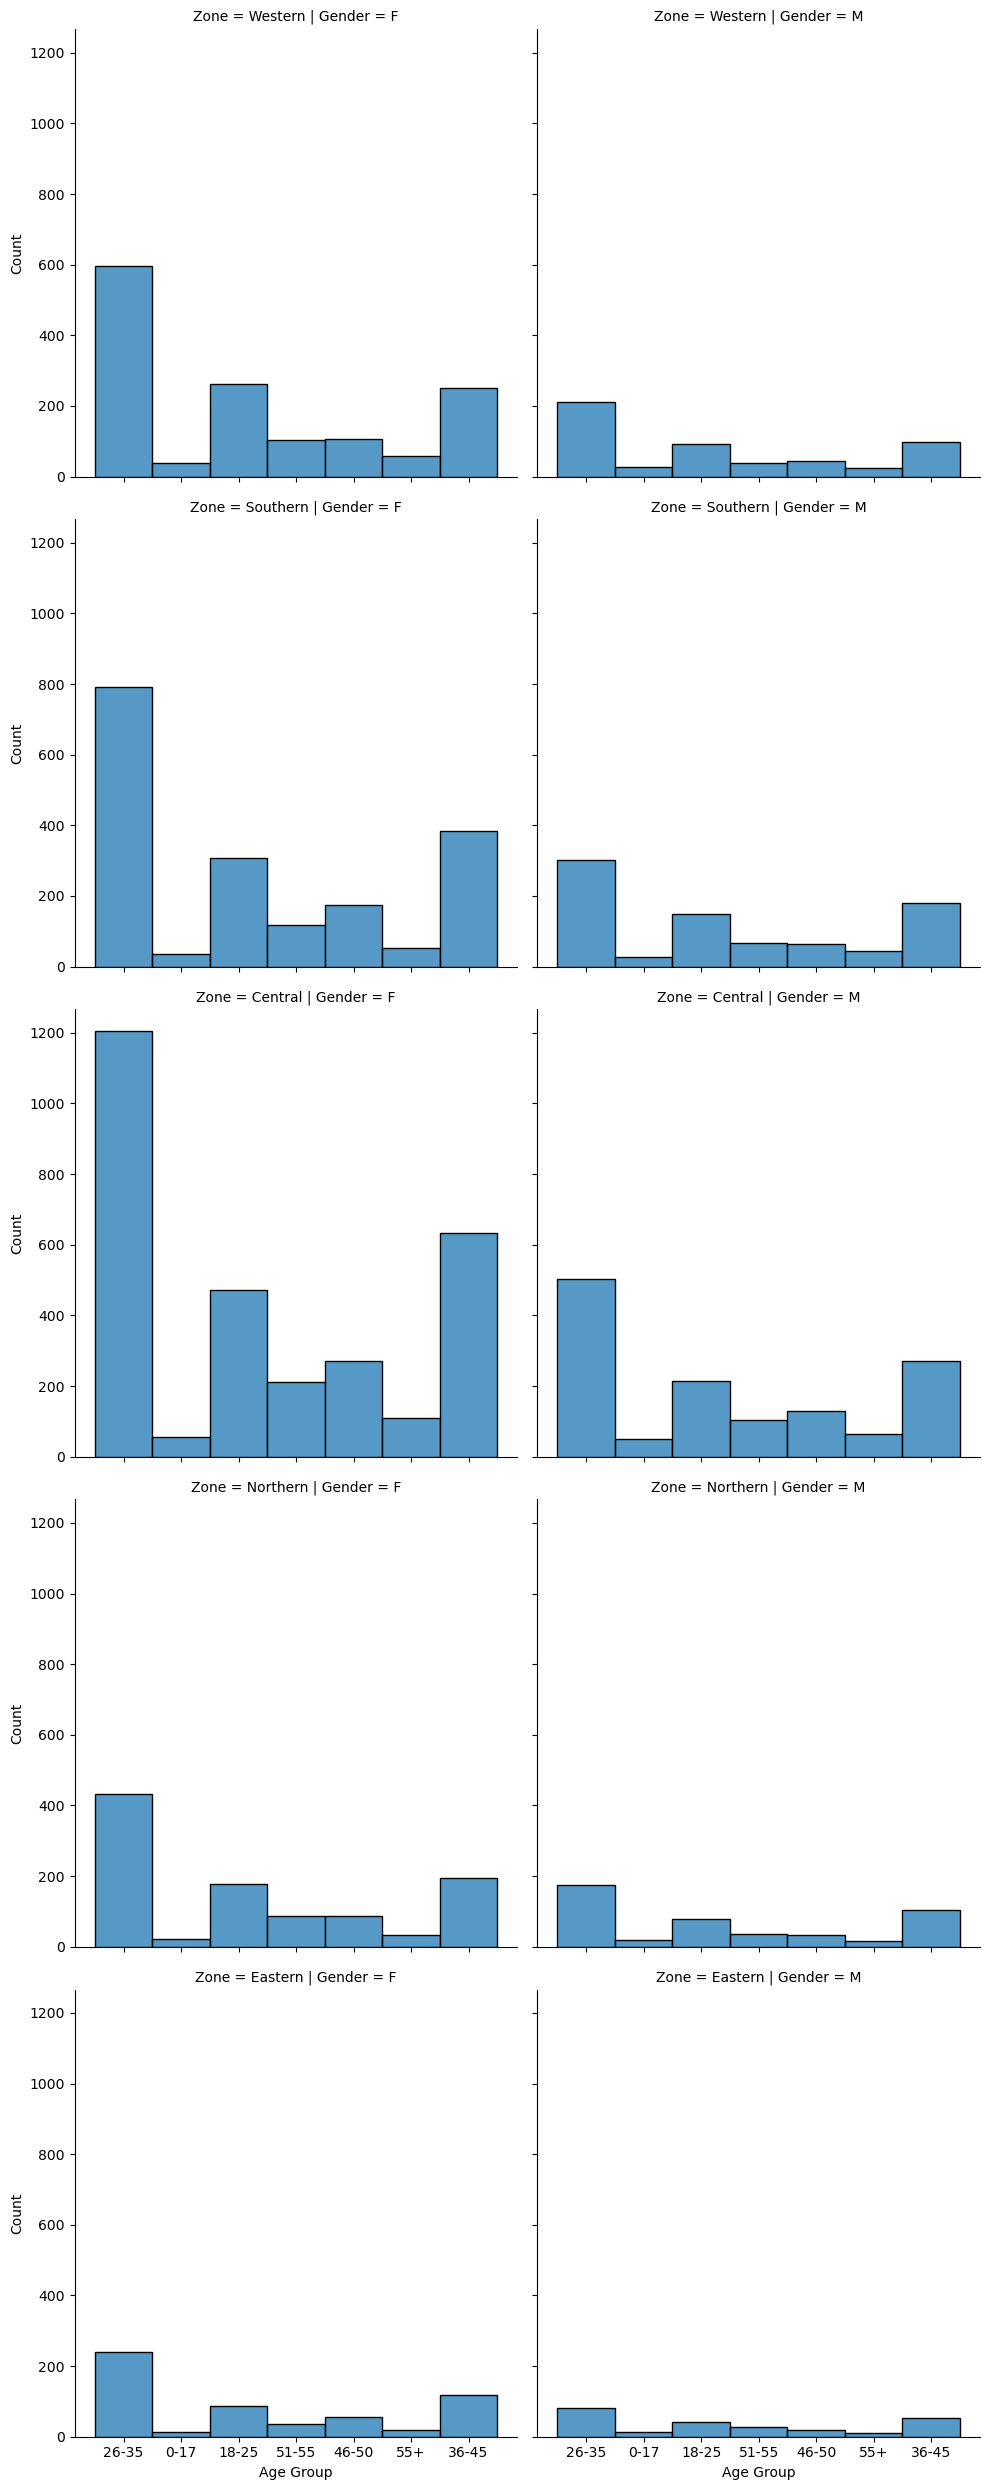

In [18]:
plt.figure(figsize=(5,20))
sns.displot(x='Age Group',data=df, row='Zone',col='Gender', kind='hist')

<Figure size 1000x1000 with 0 Axes>

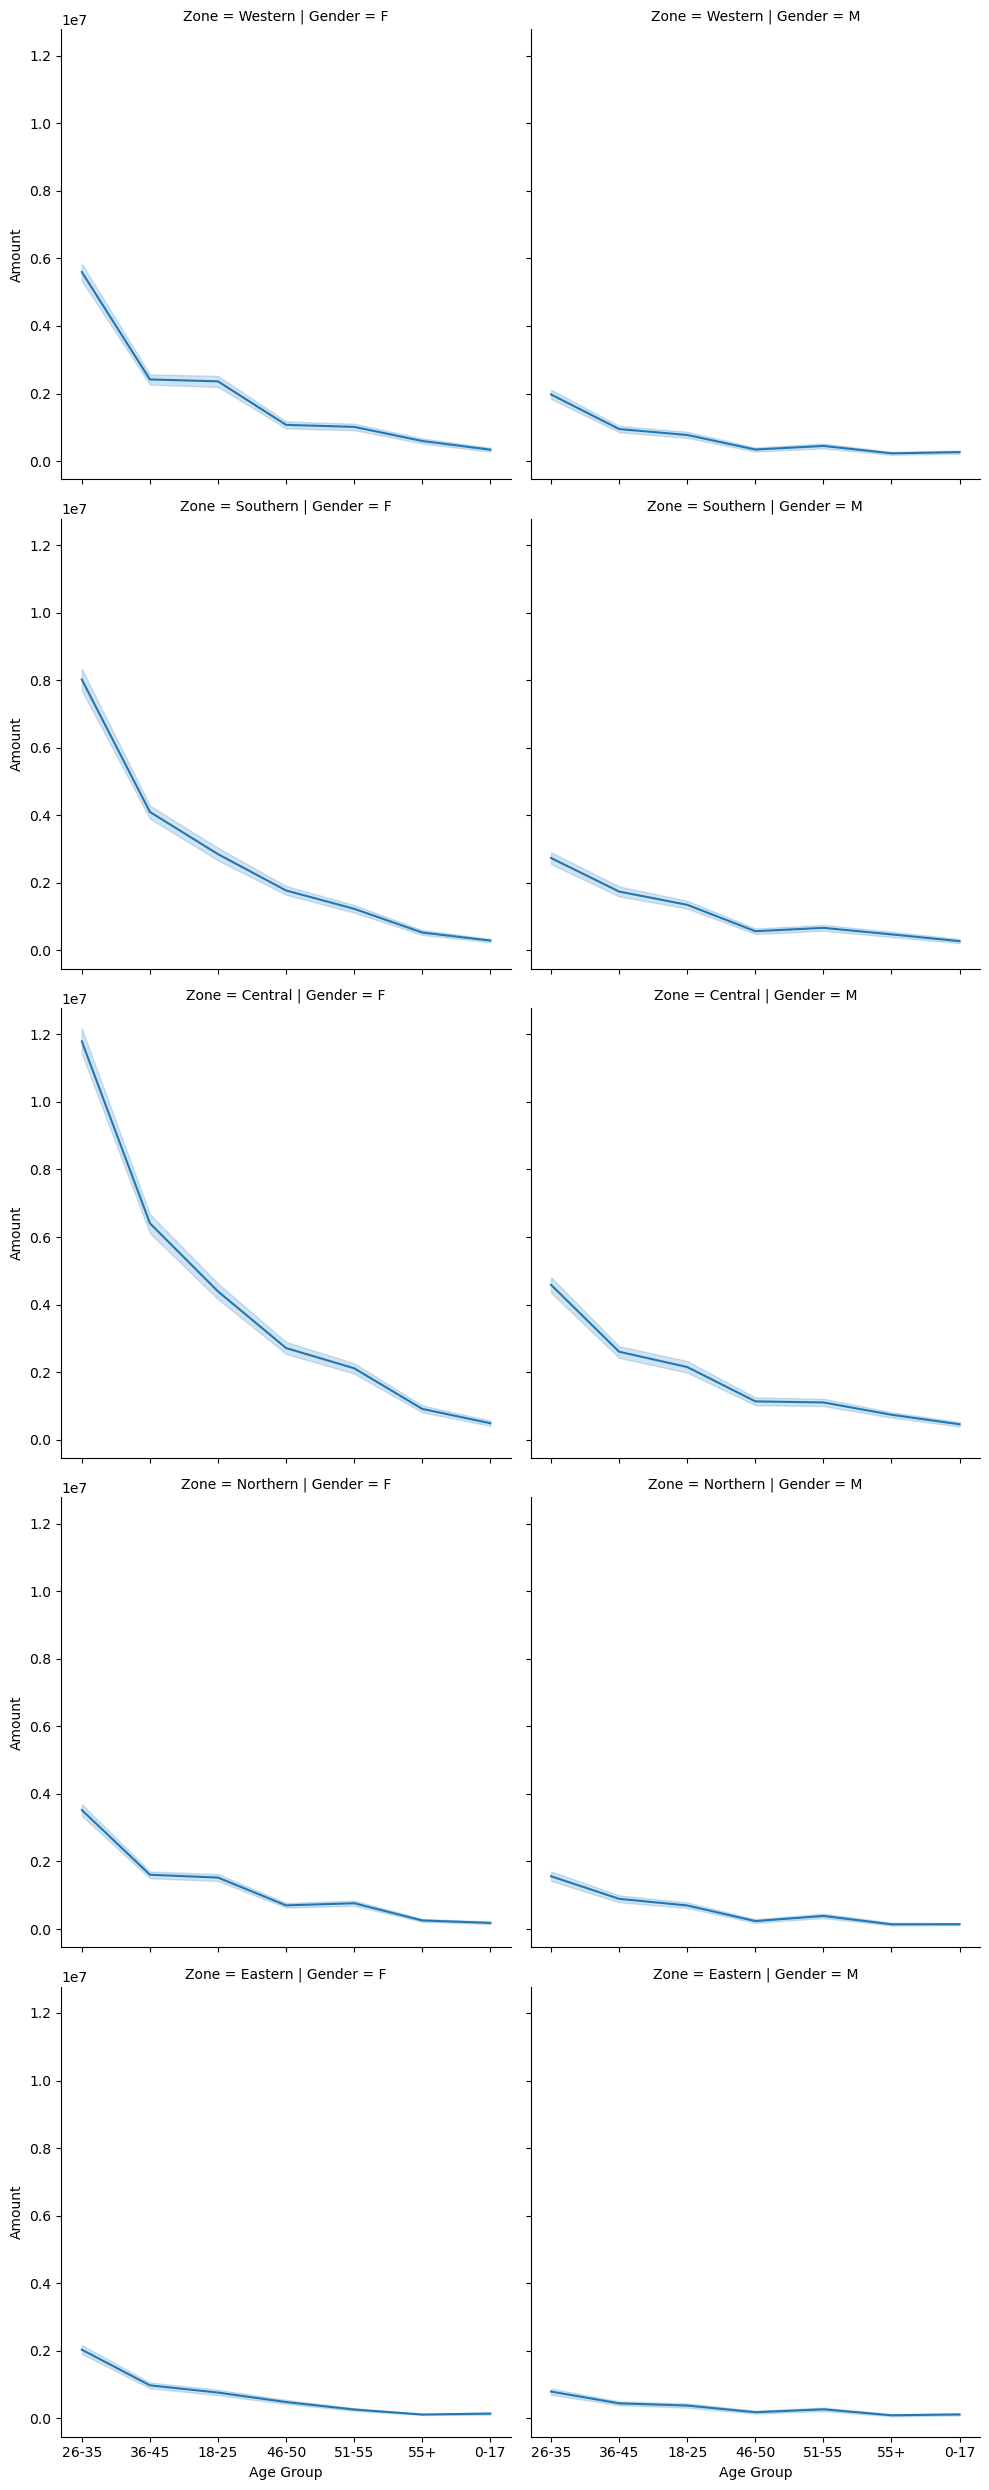

In [19]:
plt.figure(figsize=(10,10))
sns.relplot(x='Age Group', y= 'Amount' ,  estimator=sum,data=df, row='Zone',col='Gender', kind='line')

From the above graphs:

We can see that the females from Central Zone of the Age Group 26-35 are more likely to buy and they have greater spending power followed by Southern Zone.

### State

<AxesSubplot:xlabel='State', ylabel='Orders'>

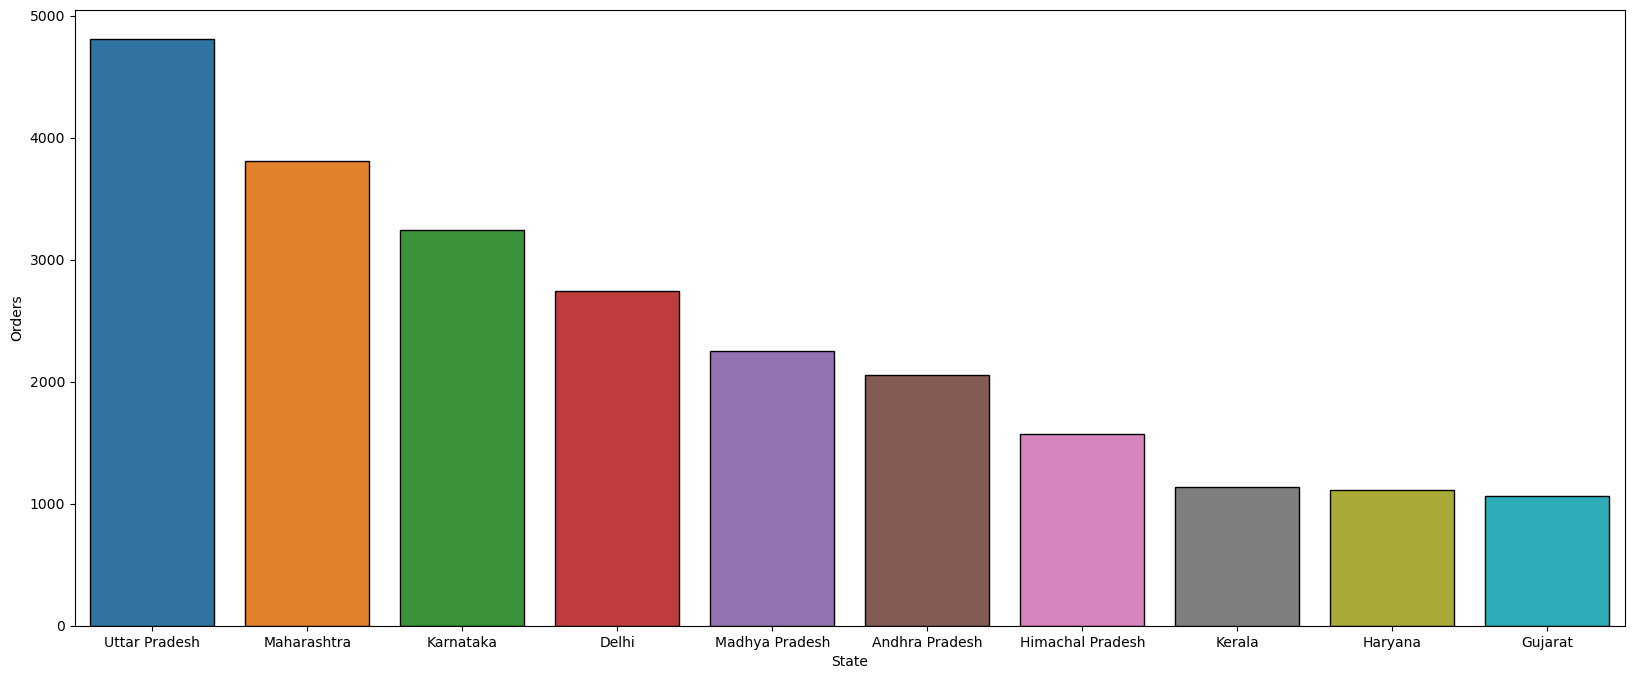

In [20]:
# total number of orders from top 10 states  by='Orders',

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
plt.figure(figsize=(20,8))
sns.barplot(data = sales_state, x = 'State',y= 'Orders',edgecolor='black')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Andhra\xa0Pradesh'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Haryana'),
  Text(8, 0, 'Bihar'),
  Text(9, 0, 'Gujarat')])

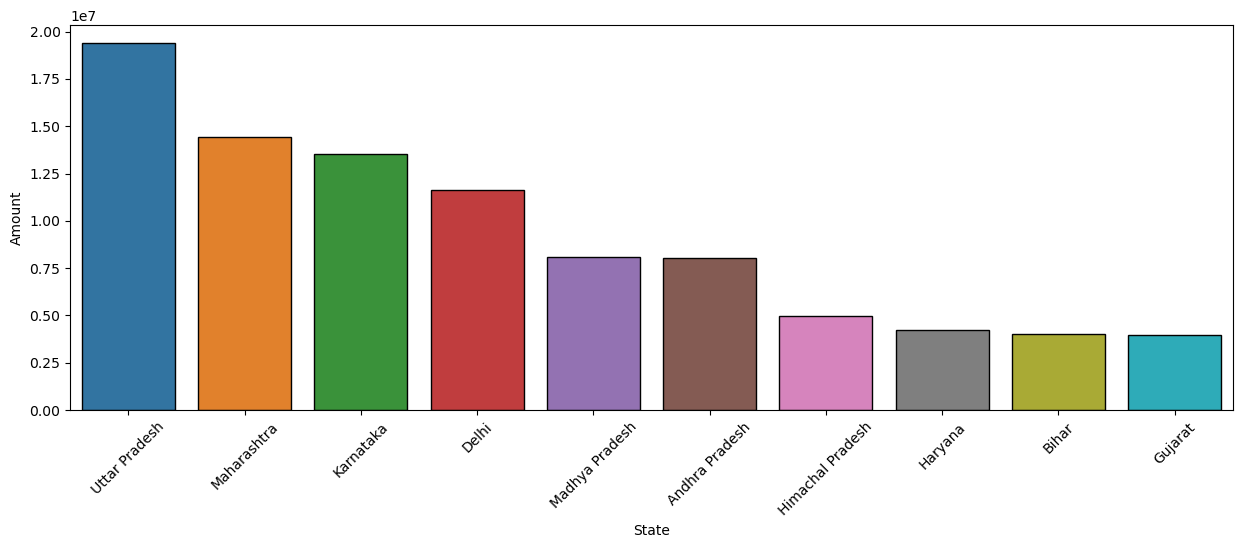

In [21]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(data = sales_state, x = 'State',y= 'Amount',edgecolor='black')
plt.xticks(rotation=45)

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status

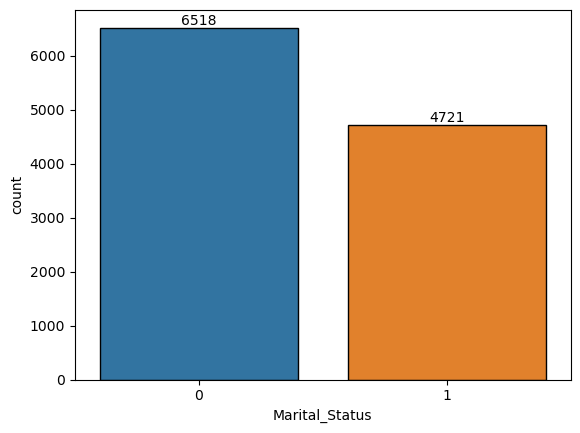

<Figure size 700x500 with 0 Axes>

In [22]:
ax = sns.countplot(data = df, x = 'Marital_Status',edgecolor='black')

plt.figure(figsize=(7,5))
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

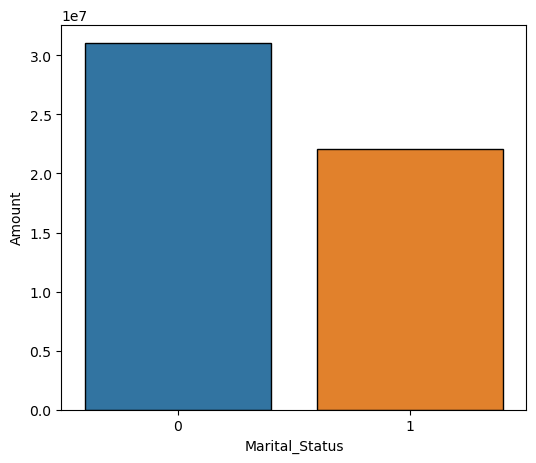

In [23]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(6,5))
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount',ci=None,edgecolor='black')

*From above graphs we can see that most of the buyers are unmarried (female) and they have high purchasing power*

<Figure size 1000x1000 with 0 Axes>

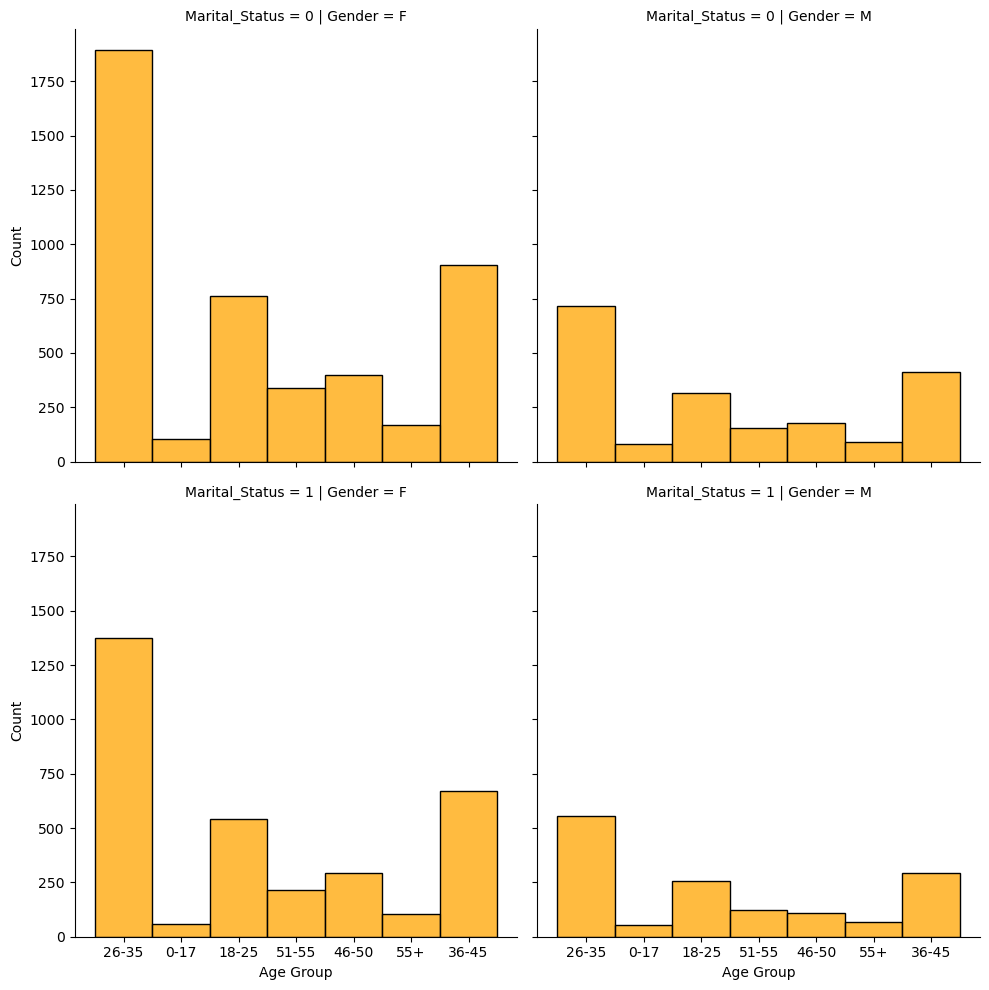

In [24]:
plt.figure(figsize=(10,10))
ax1=sns.displot(x='Age Group',data=df, row='Marital_Status',col='Gender', kind='hist',color='orange')

Relational Plot for Amount v/s age group on the basis of (Gender,Maritial status) for deeper insights..

<Figure size 1000x1000 with 0 Axes>

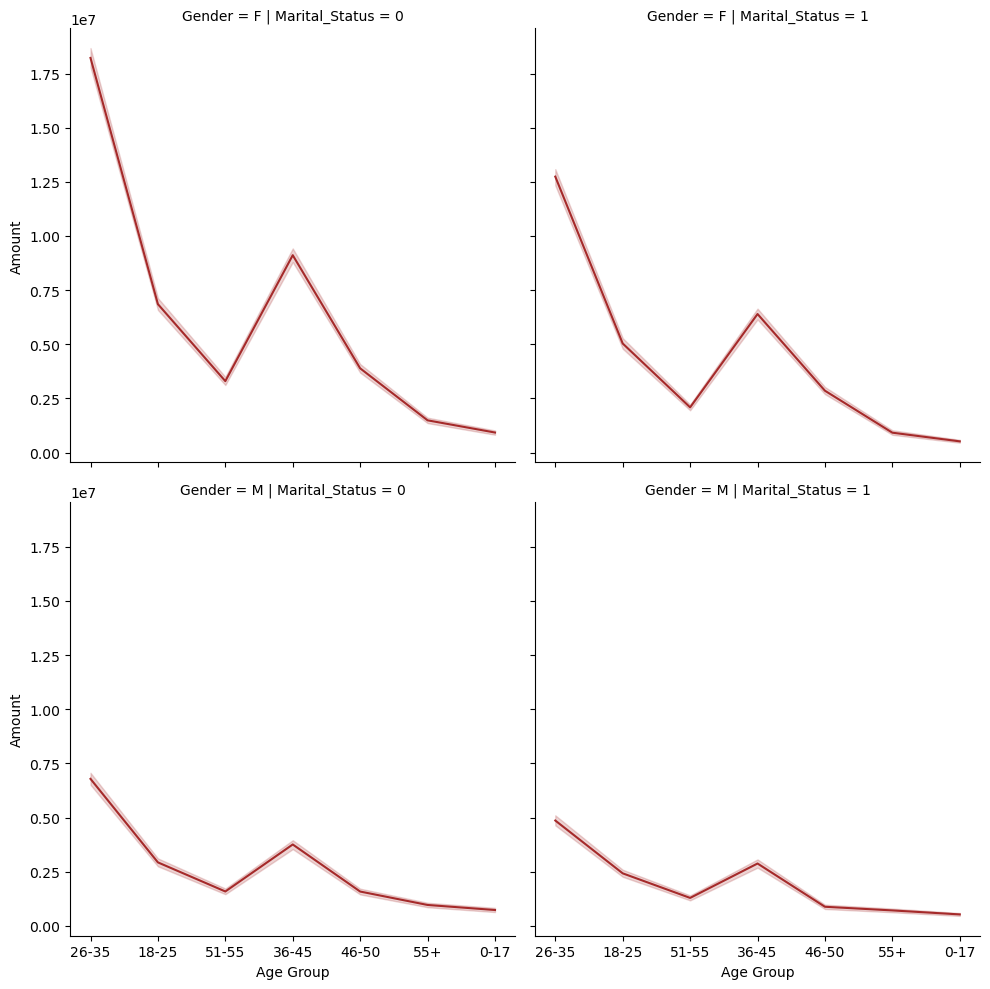

In [25]:
plt.figure(figsize=(10,10))
sns.relplot(x='Age Group', y= 'Amount' ,  estimator=sum,data=df, row='Gender',col='Marital_Status', kind='line',color='brown')

From the above two graphs we can see:



Most Buyers are unmarried females in the age group 26-35 and they are spending more than other groups.

### Occupation

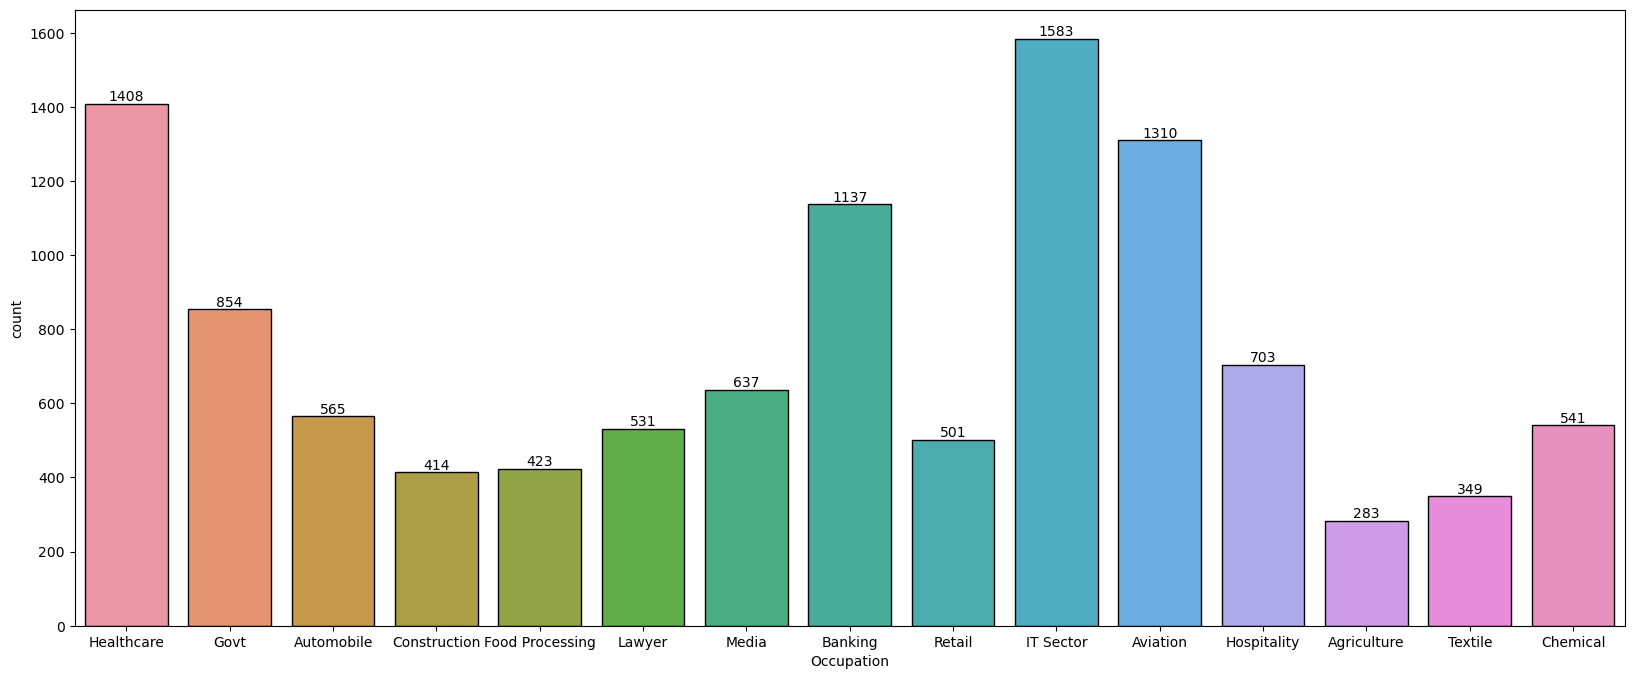

In [26]:
plt.figure(figsize=(20,8))
ax = sns.countplot(data = df, x = 'Occupation',edgecolor='black')
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

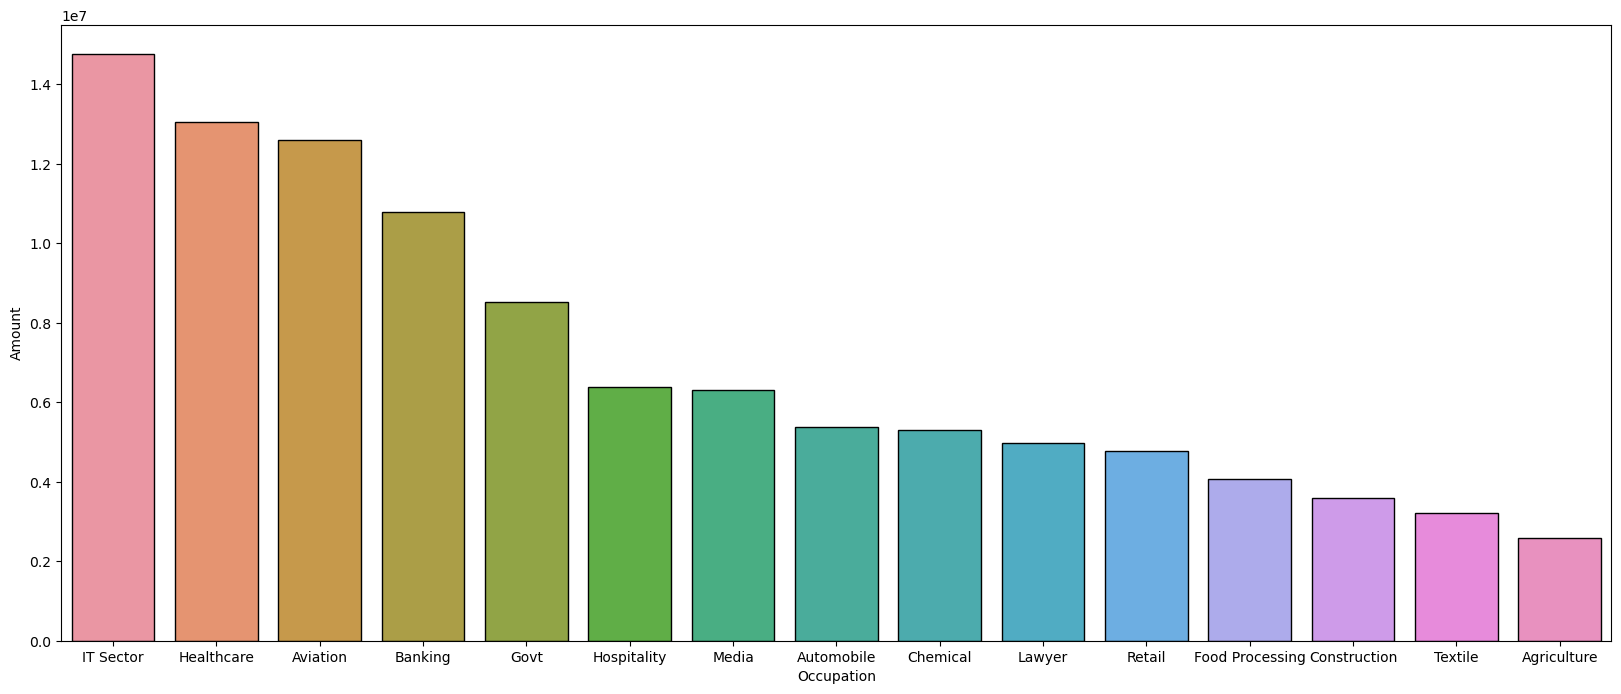

In [27]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount',edgecolor='black')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

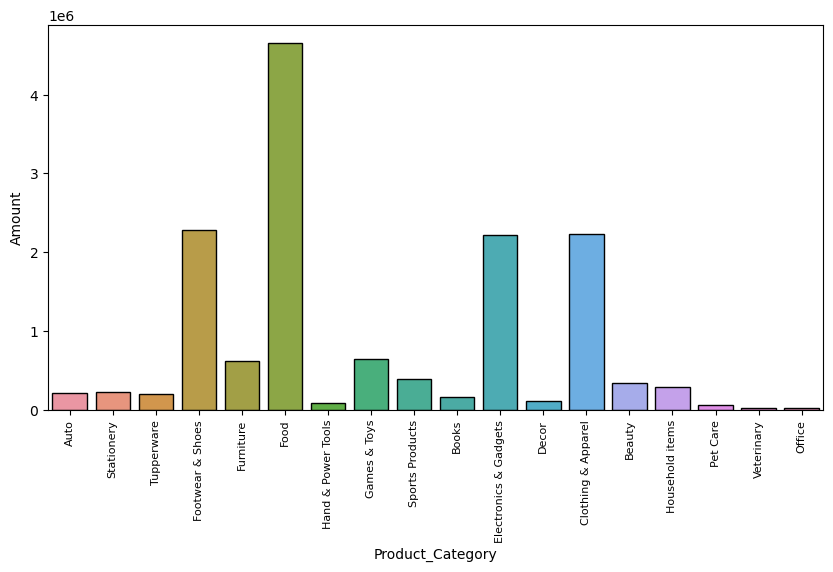

In [28]:
IT=df[df['Occupation']=='IT Sector']
#IT.head()
plt.figure(figsize=(10,5))
plt.xticks(rotation=90,size=8)
sns.barplot(x='Product_Category',y='Amount',estimator=sum,data=IT,ci=None,edgecolor='black')

People from IT are more likely to order food and most of their expenses goes into it

### Product Category

Text(0.5, 0, 'Product_Category')

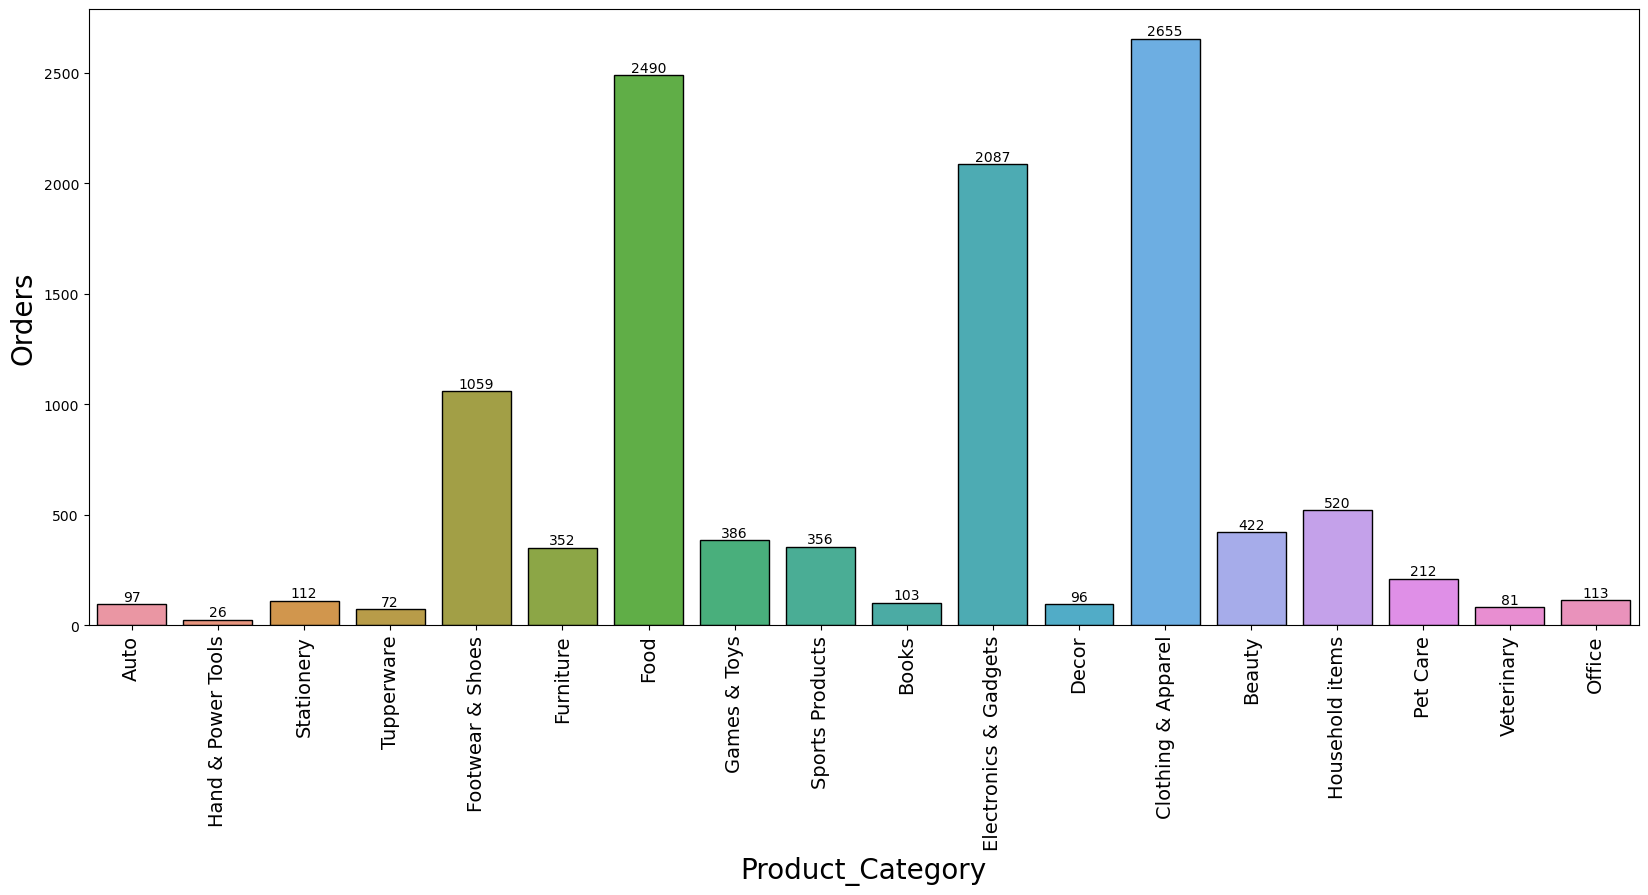

In [35]:
plt.figure(figsize=(20,8))
ax = sns.countplot(data = df, x = 'Product_Category',edgecolor='black')
plt.xticks(rotation=90,size=14)
for bars in ax.containers:
    ax.bar_label(bars)
plt.ylabel('Orders',size=20)
plt.xlabel('Product_Category',size=20)

Text(0.5, 0, 'Product_Category')

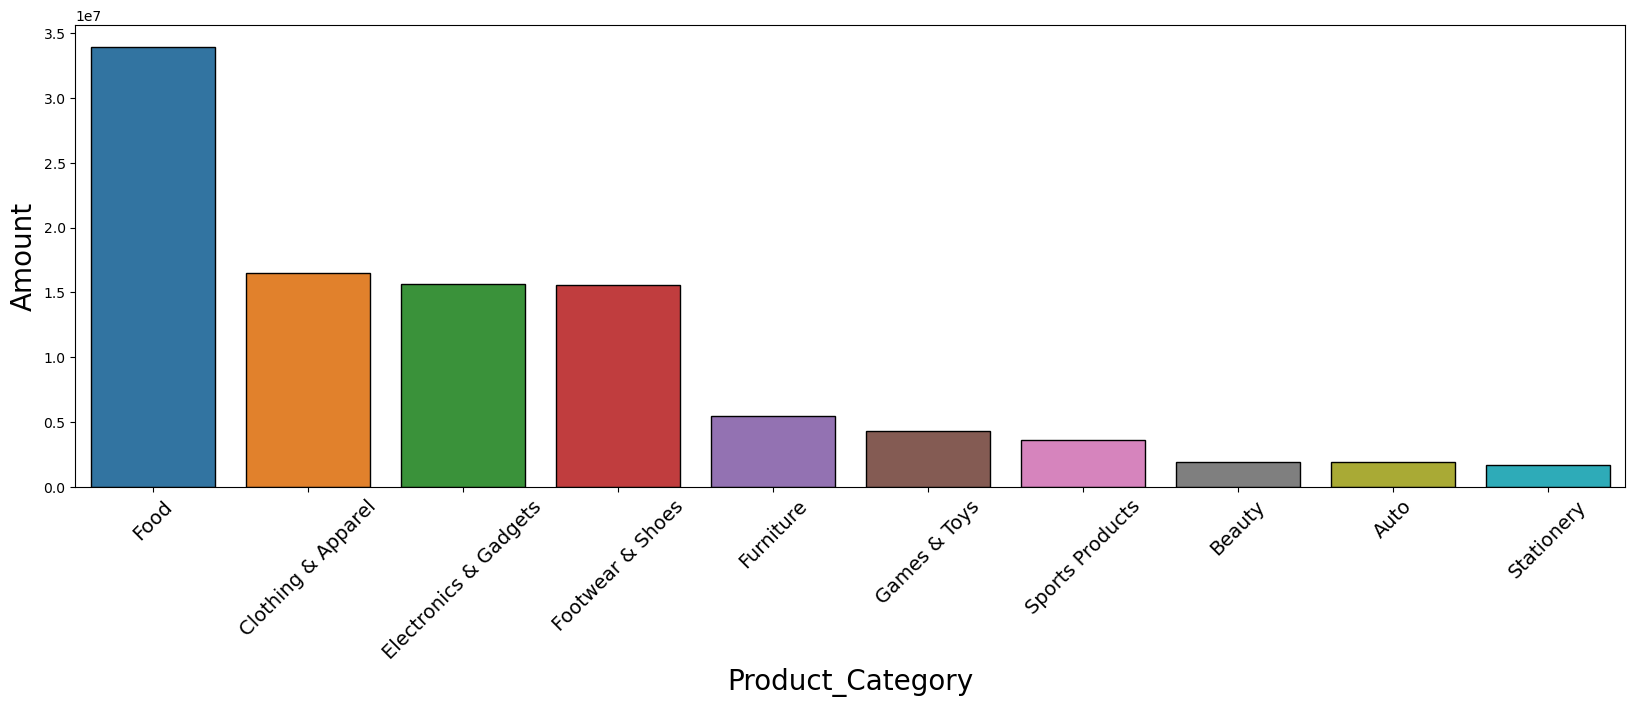

In [30]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.figure(figsize=(20,6))
ax=sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount',edgecolor='black')
plt.xticks(rotation=45,size=14)
plt.ylabel('Amount',size=20)
plt.xlabel('Product_Category',size=20)

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

Text(0.5, 0, 'Product_ID')

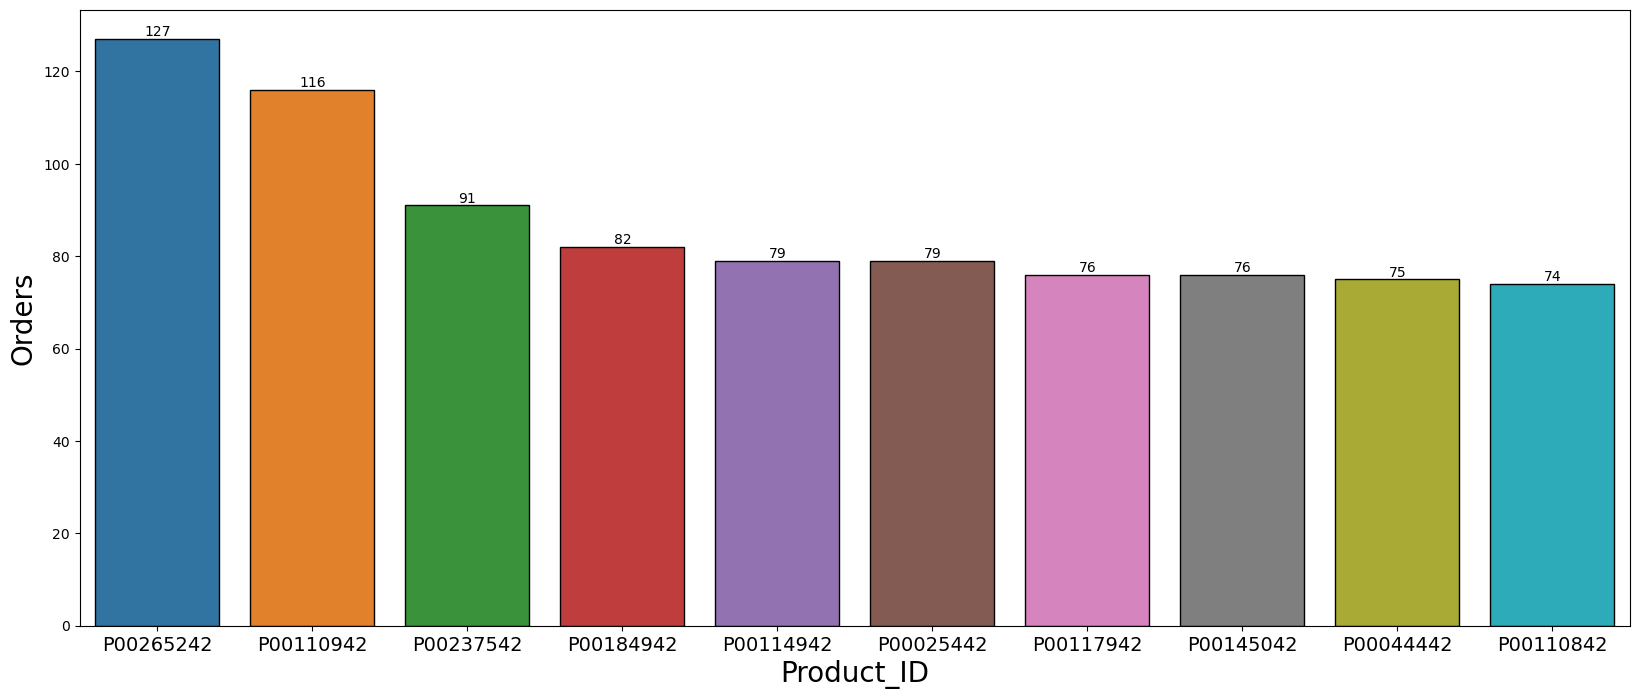

In [31]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
plt.figure(figsize=(20,8))
ax=sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders',edgecolor='black')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(size=14)
plt.ylabel('Orders',size=20)
plt.xlabel('Product_ID',size=20)

These are the product ID of most orderred Product.

## Conclusion:

*UnMarried women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*

Thank you!